In [3]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data = pd.read_csv("supply_chain_data.csv")
print(data.shape)
print(data.info())

(100, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location         

In [3]:
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [4]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

              Order quantities  Stock levels
Product type                                
cosmetics                 1343          1525
haircare                  1480          1644
skincare                  2099          1608


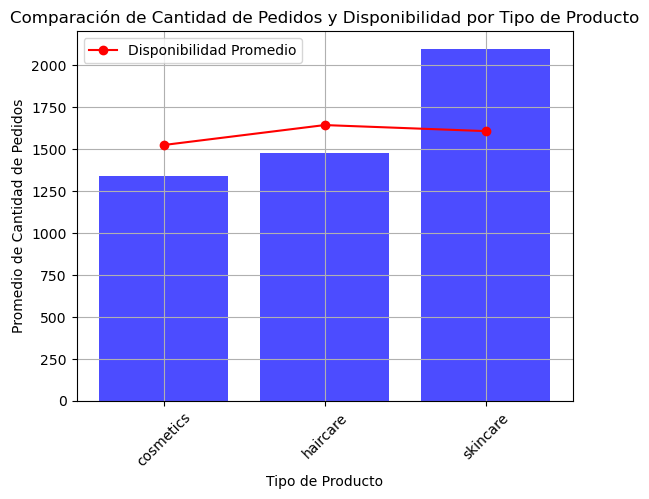

In [5]:
products =data.groupby(['Product type'])['Order quantities'].sum()
AV =data.groupby(['Product type'])['Stock levels'].sum()

df_plot = pd.DataFrame({'Order quantities': products,'Stock levels': AV })
print(df_plot)

fig, ax = plt.subplots()

ax.bar(df_plot.index, df_plot['Order quantities'], color='blue', alpha=0.7)
ax.set_xlabel('Tipo de Producto')
ax.set_ylabel('Promedio de Cantidad de Pedidos')
ax.plot(df_plot.index, df_plot['Stock levels'], color='red', marker='o')
plt.title('Comparación de Cantidad de Pedidos y Disponibilidad por Tipo de Producto')
plt.legend(['Disponibilidad Promedio']) 
plt.grid(True)
plt.xticks(rotation=45) 

plt.show()

In [48]:

average_availability = data.groupby('Product type')['Availability'].mean()
print(average_availability)

data['Out_of_Stock'] = data['Availability'] < 20

unavailable_products = data[data['Out_of_Stock']].groupby('Product type')['Product type'].count()


total_products = data.groupby('Product type')['Product type'].count()

availability_percentage = (total_products - unavailable_products) / total_products * 100

analysis_df = pd.DataFrame({
    'Product type': defect_rates.index, 
    'Defect Rate': data.groupby('Product type')['Defect rates'].mean(), 
    'Availability Percentage': availability_percentage.values
})

print(analysis_df)

Product type
cosmetics    51.230769
haircare     43.264706
skincare     50.925000
Name: Availability, dtype: float64
             Product type  Defect Rate  Availability Percentage
Product type                                                   
cosmetics       cosmetics     1.919287                76.923077
haircare         haircare     2.483150                73.529412
skincare         skincare     2.334681                77.500000


Summary Statistics for Lead times:
count    100.000000
mean      15.960000
std        8.785801
min        1.000000
25%        8.000000
50%       17.000000
75%       24.000000
max       30.000000
Name: Lead times, dtype: float64


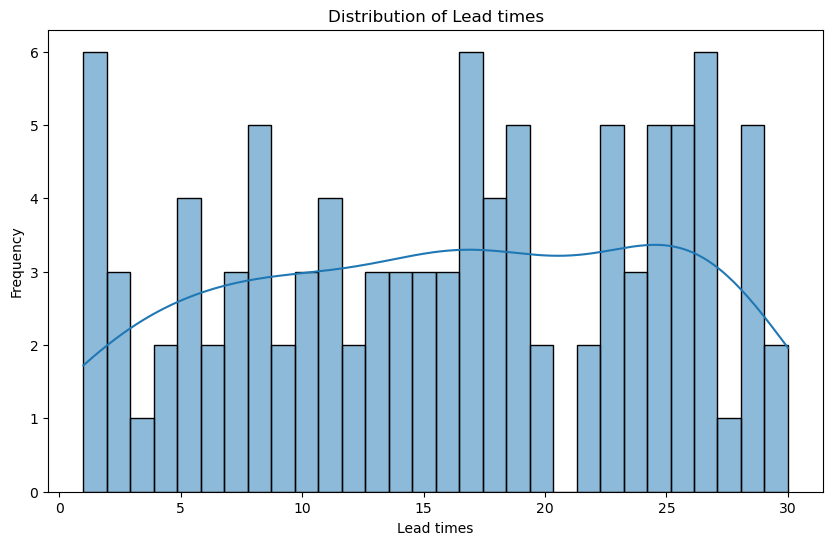

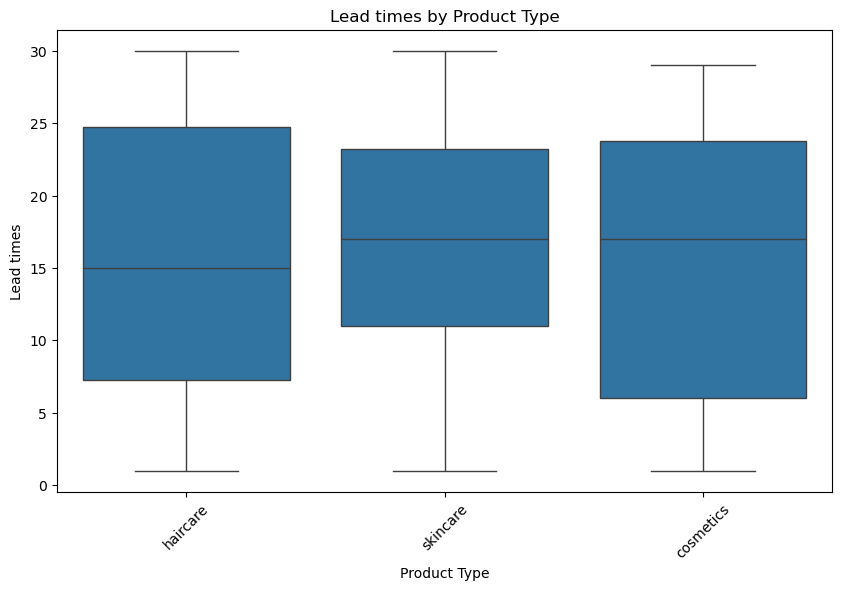

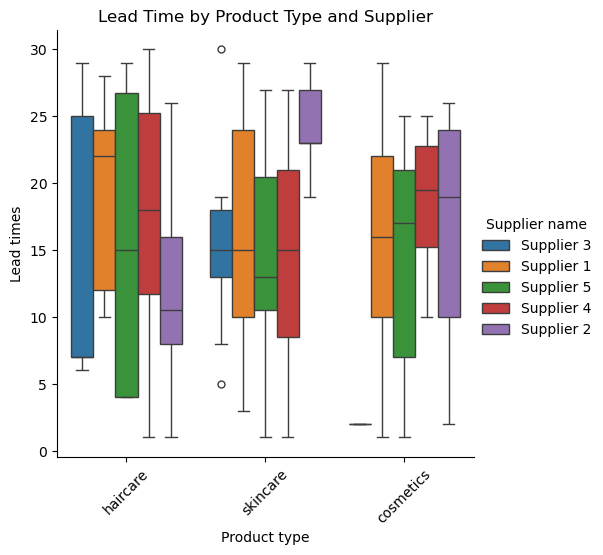

In [15]:
print("Summary Statistics for Lead times:")
print(data['Lead times'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Lead times'], bins=30, kde=True) 
plt.xlabel("Lead times")
plt.ylabel("Frequency")
plt.title("Distribution of Lead times")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Lead times', data=data)
plt.xlabel("Product Type")
plt.ylabel("Lead times")
plt.title("Lead times by Product Type")
plt.xticks(rotation=45)
plt.show()


sns.catplot(x='Product type', y='Lead times', hue='Supplier name', data=data, kind='box')
plt.xticks(rotation=45)
plt.title("Lead Time by Product Type and Supplier")
plt.show()

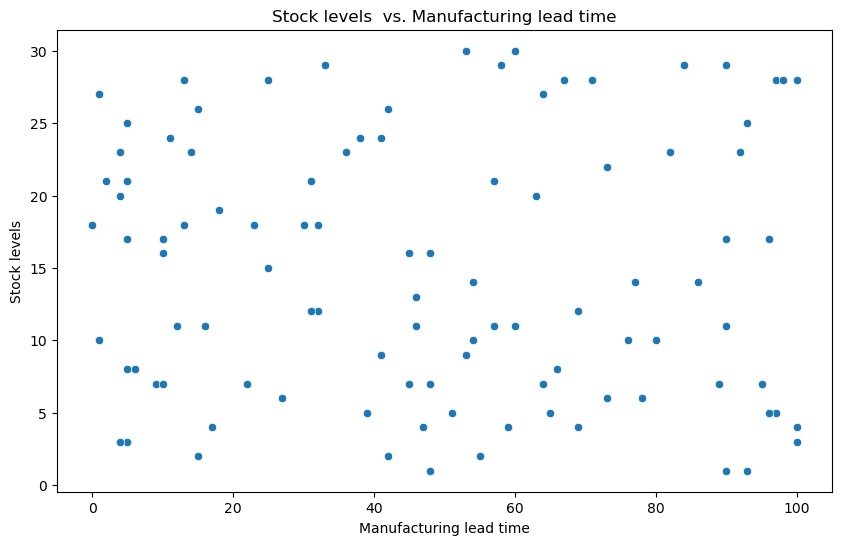

coeficiente de correlación de pearson:-0.05


In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= 'Stock levels', y='Manufacturing lead time', data=data)
plt.xlabel("Manufacturing lead time")
plt.ylabel("Stock levels")
plt.title("Stock levels  vs. Manufacturing lead time")
plt.show() 

correlation = data['Manufacturing lead time'].corr(data['Stock levels'])
print(f"coeficiente de correlación de pearson:{round(correlation,2)}")

Summary Statistics for Carrying Cost:
count    100.000000
mean     529.245782
std      258.301696
min      103.916248
25%      318.778455
50%      520.430444
75%      763.078231
max      997.413450
Name: Costs, dtype: float64
Summary Statistics for Manufacturing lead times:
count    100.00000
mean      14.77000
std        8.91243
min        1.00000
25%        7.00000
50%       14.00000
75%       23.00000
max       30.00000
Name: Manufacturing lead time, dtype: float64
Correlation between Manufacturing lead time and  Cost: -0.07409199063720535


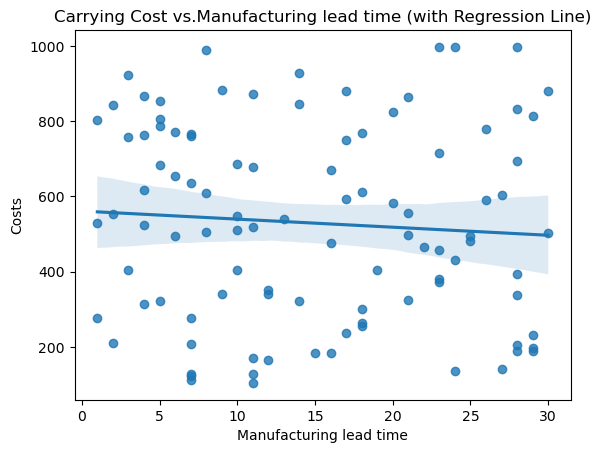

In [5]:
print("Summary Statistics for Carrying Cost:")
print(data['Costs'].describe())

print("Summary Statistics for Manufacturing lead times:")
print(data['Manufacturing lead time'].describe())

correlation = data['Manufacturing lead time'].corr(data['Costs'])
print(f"Correlation between Manufacturing lead time and  Cost: {correlation}")


sns.regplot(x='Manufacturing lead time', y='Costs', data=data)
plt.xlabel("Manufacturing lead time")
plt.ylabel("Costs")
plt.title("Carrying Cost vs.Manufacturing lead time (with Regression Line)")
plt.show()

In [8]:

average_lead_time = data.groupby('Product type')['Lead times'].mean()

data['Lead times'] = data['Lead times'] > data['Product type'].map(average_lead_time)

extended_lead_time_percentage = (
    data[data['Lead times']].groupby('Product type')['Product type'].count() / 
    data.groupby('Product type')['Product type'].count() 
) * 100

analysis_df = pd.DataFrame({
    'Product type': extended_lead_time_percentage.index,
    'Lead times': extended_lead_time_percentage.values 
})

analysis_df = analysis_df.sort_values(by='Lead times', ascending=False)


print(analysis_df)

  Product type  Lead times
0    cosmetics   61.538462
2     skincare   52.500000
1     haircare   50.000000


In [9]:

mode_costs = data.groupby('Transportation modes')[['Shipping costs', 'Costs']].sum()
mode_costs['Shipping Cost Percentage'] = (mode_costs['Shipping costs'] / mode_costs['Costs'])*100
print(mode_costs)

most_expensive_mode = mode_costs['Shipping costs'].idxmax()
print(f"the most expensive transportation mode is:{(most_expensive_mode)}")


                      Shipping costs         Costs  Shipping Cost Percentage
Transportation modes                                                        
Air                       156.463824  14604.527498                  1.071338
Rail                      153.134742  15168.931559                  1.009529
Road                      160.721346  16048.193639                  1.001492
Sea                        84.494995   7102.925520                  1.189580
the most expensive transportation mode is:Road


In [11]:
route_costs = data.groupby('Routes')['Shipping costs'].sum().reset_index()
highest_cost_routes = route_costs.sort_values(by='Shipping costs', ascending=False)
highest_cost_routes_df = highest_cost_routes[['Routes', 'Shipping costs']]
print(highest_cost_routes_df.head(10))

    Routes  Shipping costs
0  Route A      231.327064
1  Route B      205.423475
2  Route C      118.064369


In [12]:
mode_location = data['Location'].mode()[0]  

print(f"Central Location: {mode_location}")

Central Location: Kolkata


In [14]:
most_expensive_mode_data = data[data['Transportation modes'] == most_expensive_mode]
route_usage = most_expensive_mode_data['Routes'].value_counts()
most_used_route = route_usage.idxmax()

products_on_route = most_expensive_mode_data[most_expensive_mode_data['Routes'] == most_used_route]['Product type'].mode()
print(f"Most Used Route for the Most Expensive Mode: {most_used_route}")
print(f"Product Types on This Route: {products_on_route}") 

Most Used Route for the Most Expensive Mode: Route B
Product Types on This Route: 0    haircare
Name: Product type, dtype: object


In [15]:
defect_rates_by_category = data.groupby('Product type')['Defect rates'].mean()

defect_rates_df = pd.DataFrame({'Product type': defect_rates_by_category.index, 
                               'Average Defect Rate': defect_rates_by_category.values})

defect_rates_df = defect_rates_df.sort_values(by='Average Defect Rate', ascending=False)

mode_inspection_results = data.groupby('Product type')['Inspection results'].agg(lambda x: pd.Series.mode(x)[0])

result_df = pd.merge(defect_rates_df, mode_inspection_results, on='Product type')


print(result_df)


  Product type  Average Defect Rate Inspection results
0     haircare             2.483150            Pending
1     skincare             2.334681            Pending
2    cosmetics             1.919287               Fail
